In [86]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait # available since 2.4.0
from selenium.webdriver.support import expected_conditions as EC # available since 2.26.0
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
import os

In [87]:
df = pd.read_csv('all_e.csv')
df['win'] = -99
df.tail(10)

,home,away,line,draft_kings,diff,score,date,win
677,Loyola Marymount,San Francisco,-4.0,-3.5,0.5,8,1/10/2021,-99
678,Florida A&M,South Carolina St.,17.0,16.5,0.5,2,1/10/2021,-99
679,New Hampshire,UMBC,-3.0,-3.0,0.0,-2,1/10/2021,-99
680,Charleston Southern,Radford,-3.0,-3.0,0.0,-20,1/10/2021,-99
681,Virginia Tech,Notre Dame,7.0,7.0,0.0,14,1/10/2021,-99
682,Prairie View A&M,Texas Southern,-3.0,-1.0,2.0,4,1/11/2021,-99
683,Utah,Colorado,-5.0,-3.5,1.5,-7,1/11/2021,-99
684,Northern Iowa,Bradley,1.0,2.0,1.0,-2,1/11/2021,-99
685,SMU,Temple,12.0,11.0,1.0,11,1/11/2021,-99
686,Wyoming,Boise St.,-8.0,-8.5,0.5,-23,1/11/2021,-99


In [88]:
df[df['diff']== 7]

,home,away,line,draft_kings,diff,score,date,win
16,BYU,Utah,-5.0,2.0,7.0,18,12/12/2020,-99
372,Georgia Southern,South Alabama,-5.0,2.0,7.0,13,1/2/2021,-99
488,Kent St.,Toledo,-5.0,2.0,7.0,-2,1/5/2021,-99


In [89]:
for index, row in df.iterrows():
    line = row['line']
    dk = row['draft_kings']
    score = row['score']
    win = -99
    if line > dk:
        if score > dk:
            win = 1
        elif score < dk:
            win = 0
        else:
            win = 2
    elif line < dk:
        if score < dk:
            win = 1
        elif score > dk:
            win = 0
        else:
            win = 2
    else:
        win = 2
    
    
    df.loc[index,'win'] = win

In [90]:
df

,home,away,line,draft_kings,diff,score,date,win
0,Georgetown,Villanova,-15.0,-11.5,3.5,-13,12/11/2020,1
1,Charleston,South Carolina St.,23.0,19.5,3.5,27,12/11/2020,1
2,West Virginia,North Texas,15.0,12.0,3.0,12,12/11/2020,2
3,Iowa,Iowa St.,11.0,13.5,2.5,28,12/11/2020,0
4,Canisius,Marist,6.0,3.5,2.5,9,12/11/2020,1
...,...,...,...,...,...,...,...,...
682,Prairie View A&M,Texas Southern,-3.0,-1.0,2.0,4,1/11/2021,0
683,Utah,Colorado,-5.0,-3.5,1.5,-7,1/11/2021,1
684,Northern Iowa,Bradley,1.0,2.0,1.0,-2,1/11/2021,1
685,SMU,Temple,12.0,11.0,1.0,11,1/11/2021,2


In [91]:
df.sort_values(by=['diff'], ascending = False)

,home,away,line,draft_kings,diff,score,date,win
371,San Jose St.,Boise St.,-18.0,-26.5,8.5,-1,1/2/2021,1
16,BYU,Utah,-5.0,2.0,7.0,18,12/12/2020,0
372,Georgia Southern,South Alabama,-5.0,2.0,7.0,13,1/2/2021,0
488,Kent St.,Toledo,-5.0,2.0,7.0,-2,1/5/2021,1
178,Gonzaga,Northwestern St.,34.0,40.5,6.5,38,12/21/2020,1
...,...,...,...,...,...,...,...,...
650,Longwood,Campbell,-2.0,-2.0,0.0,-6,1/9/2021,2
651,Charleston Southern,Radford,-1.0,-1.0,0.0,-15,1/9/2021,2
652,Milwaukee,IUPUI,7.0,7.0,0.0,8,1/9/2021,2
176,Green Bay,Milwaukee,1.0,1.0,0.0,-12,12/20/2020,2


In [92]:

def get_yesterday():
    today = datetime.today()
    yesterday = today - timedelta(days = 1)
    year = yesterday.year
    month = yesterday.month
    day = yesterday.day
    return year,month,day
year,month,day = get_yesterday()

In [93]:
date = str(month)+'/'+str(day)+'/'+str(year)
date

'1/11/2021'

In [94]:
df_yesterday = df[df['date'] == date]

In [95]:
df_yesterday['win'].value_counts(sort = False)

0    2
1    2
2    1
Name: win, dtype: int64

In [96]:
df_yesterday['line_diff'] = abs(df_yesterday['line'] - df_yesterday['score'])
df_yesterday['dk_diff'] = abs(df_yesterday['draft_kings'] - df_yesterday['score'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
print(df_yesterday['line_diff'].mean(),df_yesterday['dk_diff'].mean())

5.6 5.4


In [98]:
df['line_diff'] = abs(df['line'] - df['score'])
df['dk_diff'] = abs(df['draft_kings'] - df['score'])

In [99]:
print(df['line_diff'].mean(),df['dk_diff'].mean())

9.002911208151383 8.888646288209607


In [100]:
df_yesterday_3 = df_yesterday[df_yesterday['diff'] > 3.0]
df_yesterday_3['win'].value_counts(sort = False)

Series([], Name: win, dtype: int64)

In [101]:
df['win'].value_counts(sort = False)

0    309
1    310
2     68
Name: win, dtype: int64

In [102]:
df_3 = df[df['diff'] > 3.0]

In [103]:
df_3['win'].value_counts(sort = False)

0    45
1    51
Name: win, dtype: int64

In [104]:
df_3_5 = df[df['diff'] > 3.5]
df_3_5['win'].value_counts(sort = False)

0    20
1    29
Name: win, dtype: int64

In [105]:
df_3['line_diff'] = abs(df_3['line'] - df_3['score'])
df_3['dk_diff'] = abs(df_3['draft_kings'] - df_3['score'])
print(df_3['line_diff'].mean(),df_3['dk_diff'].mean())

9.958333333333334 9.557291666666666


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
win = []
loss = []
index = []
for i in range(0,20):
    x = i/2
    df_new = df[df['diff'] == x]
    series = df_new['win'].value_counts(sort = False)
    
    index.append(x)
    try:
        win.append(series[1])
    except:
        win.append(0)
    try:
        loss.append(series[0])
    except:
        loss.append(0)

In [107]:
win_percentage = []
for i,x in enumerate(win):
    if (win[i]+loss[i]) != 0:
        if win[i] == 0:
            win_percentage.append(1/100)
        else:
            win_percentage.append(win[i]/(win[i]+loss[i]))
    else:
        win_percentage.append(0)

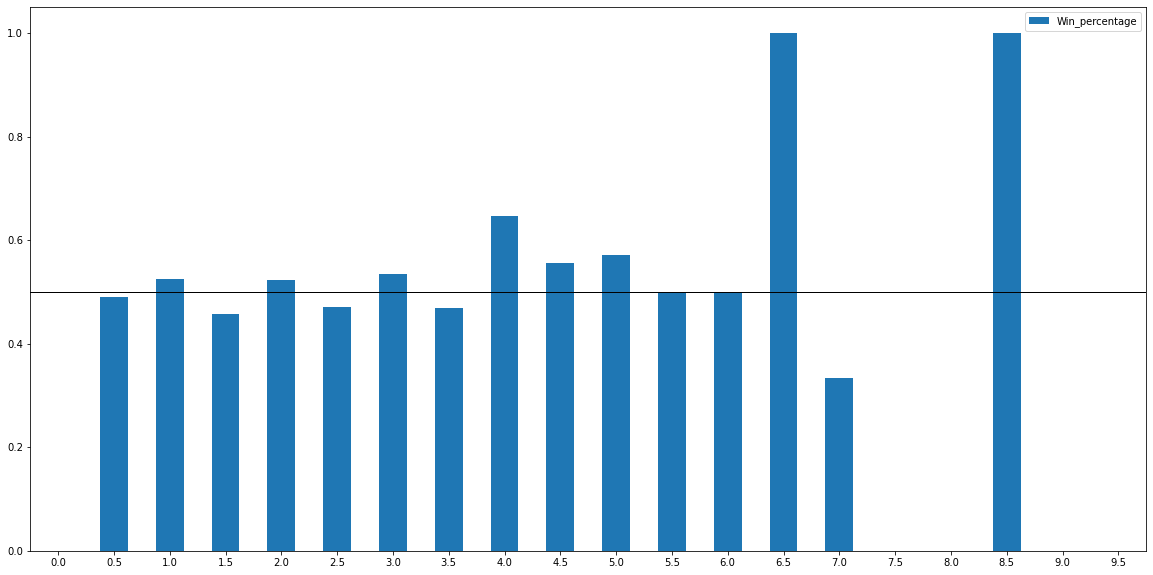

In [108]:
plot = pd.DataFrame({'Win_percentage': win_percentage}, index=index)
ax = plot.plot.bar(rot=0, figsize=(20,10))
plt.axhline(y=.5,linewidth=1, color='k')

In [109]:
df_yesterday

,home,away,line,draft_kings,diff,score,date,win,line_diff,dk_diff
682,Prairie View A&M,Texas Southern,-3.0,-1.0,2.0,4,1/11/2021,0,7.0,5.0
683,Utah,Colorado,-5.0,-3.5,1.5,-7,1/11/2021,1,2.0,3.5
684,Northern Iowa,Bradley,1.0,2.0,1.0,-2,1/11/2021,1,3.0,4.0
685,SMU,Temple,12.0,11.0,1.0,11,1/11/2021,2,1.0,0.0
686,Wyoming,Boise St.,-8.0,-8.5,0.5,-23,1/11/2021,0,15.0,14.5


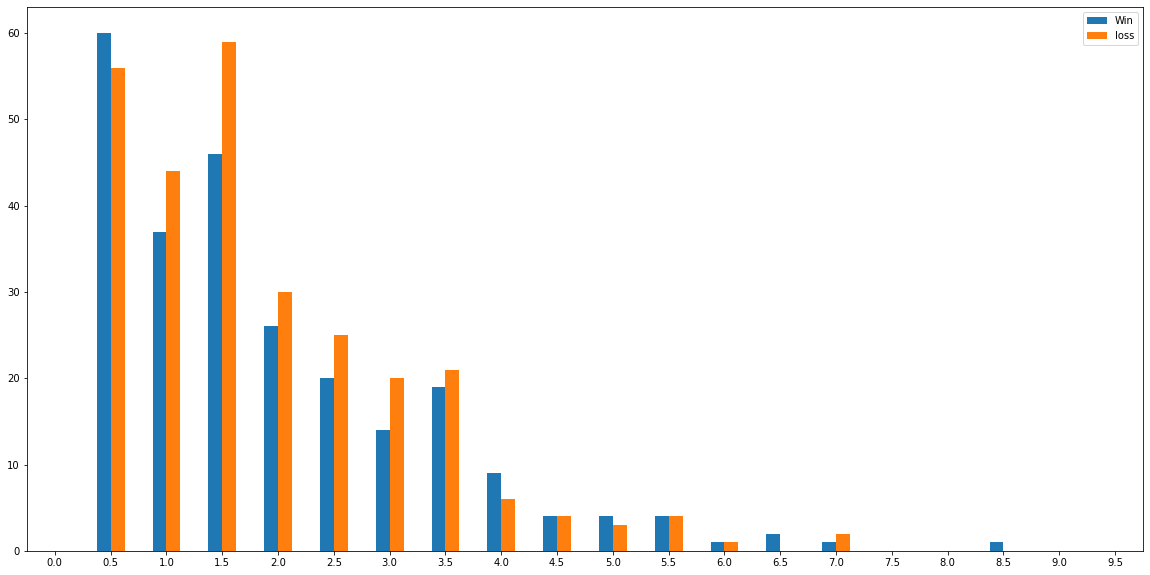

In [24]:
plot = pd.DataFrame({'Win': win,
                   'loss': loss}, index=index)
ax = plot.plot.bar(rot=0, figsize=(20,10))

In [122]:
import time
conf = {}
options = webdriver.ChromeOptions() 
#options.add_argument(r'''user-data-dir=C:\Users\Tarik's PC\AppData\Local\Google\Chrome\User Data''')
#"user-data-dir=C:\Users\Tarik's PC\AppData\Local\Google\Chrome\User Data" home
# "user-data-dir=C:\Users\koric1\AppData\Local\Google\Chrome\User Data" work
#options.add_argument("--start-maximized")
#self.options.add_argument("--headless")
#self.options.add_argument("--no-sandbox")
#self.options.add_argument("--disable-gpu")
options.add_argument('--headless')
options.add_argument('--disable-gpu')  # Last I checked this was necessa
driver = webdriver.Chrome(chrome_options= options)



driver.get('https://kenpom.com/')
time.sleep(1)

for x in range(1,10):
    try:
        for z in range(1,41):

            team_name = str(driver.find_element_by_xpath('//*[@id="ratings-table"]/tbody['+str(x)+']/tr['+str(z)+']/td[2]/a').text)
            team_conf = str(driver.find_element_by_xpath('//*[@id="ratings-table"]/tbody['+str(x)+']/tr['+str(z)+']/td[3]').text)
            conf[team_name] = team_conf
    except:
        break
driver.close()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [60]:
conf

{'Gonzaga': 'WCC',
 'Baylor': 'B12',
 'Villanova': 'BE',
 'Iowa': 'B10',
 'West Virginia': 'B12',
 'Wisconsin': 'B10',
 'Texas': 'B12',
 'Kansas': 'B12',
 'Texas Tech': 'B12',
 'Illinois': 'B10',
 'Tennessee': 'SEC',
 'Duke': 'ACC',
 'Houston': 'Amer',
 'Florida St.': 'ACC',
 'Creighton': 'BE',
 'Michigan': 'B10',
 'Indiana': 'B10',
 'Virginia': 'ACC',
 'Rutgers': 'B10',
 'Michigan St.': 'B10',
 'Clemson': 'ACC',
 'Louisville': 'ACC',
 'Oregon': 'P12',
 'Ohio St.': 'B10',
 'Florida': 'SEC',
 'UCLA': 'P12',
 'North Carolina': 'ACC',
 'Saint Louis': 'A10',
 'San Diego St.': 'MWC',
 'Syracuse': 'ACC',
 'Purdue': 'B10',
 'LSU': 'SEC',
 'Colorado': 'P12',
 'Stanford': 'P12',
 'Arkansas': 'SEC',
 'Missouri': 'SEC',
 'Oklahoma': 'B12',
 'Mississippi': 'SEC',
 'USC': 'P12',
 'Kentucky': 'SEC',
 'Virginia Tech': 'ACC',
 'Marquette': 'BE',
 'N.C. State': 'ACC',
 'Arizona': 'P12',
 'Penn St.': 'B10',
 'Connecticut': 'BE',
 'Seton Hall': 'BE',
 'SMU': 'Amer',
 'Xavier': 'BE',
 'Oklahoma St.': 'B12

In [61]:
df['home_conf'] = df.apply(lambda x: conf[x['home']], axis = 1)
df['away_conf'] = df.apply(lambda x: conf[x['away']], axis = 1)
df.head()

,home,away,line,draft_kings,diff,score,date,win,line_diff,dk_diff,home_conf,away_conf
0,Georgetown,Villanova,-15.0,-11.5,3.5,-13,12/11/2020,1,2.0,1.5,BE,BE
1,Charleston,South Carolina St.,23.0,19.5,3.5,27,12/11/2020,1,4.0,7.5,CAA,MEAC
2,West Virginia,North Texas,15.0,12.0,3.0,12,12/11/2020,2,3.0,0.0,B12,CUSA
3,Iowa,Iowa St.,11.0,13.5,2.5,28,12/11/2020,0,17.0,14.5,B10,B12
4,Canisius,Marist,6.0,3.5,2.5,9,12/11/2020,1,3.0,5.5,MAAC,MAAC


In [62]:
win = []
loss = []
index = []
for i in range(0,20):
    x = i/2
    df_new = df[(df['home_conf'] == 'B10')  |  (df['away_conf'] == 'B10')]
    df_new = df_new[(df_new['diff'] == x)]
    series = df_new['win'].value_counts(sort = False)

    index.append(x)
    try:
        win.append(series[1])
    except:
        win.append(0)
    try:
        loss.append(series[0])
    except:
        loss.append(0)
   

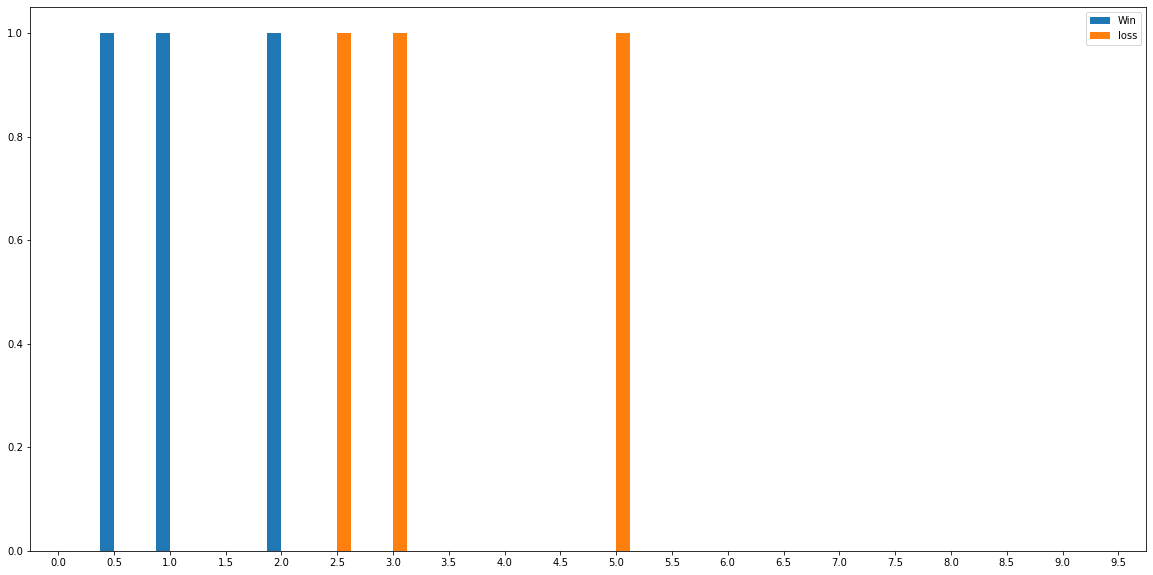

In [63]:
plot = pd.DataFrame({'Win': win,
                   'loss': loss}, index=index)
ax = plot.plot.bar(rot=0, figsize=(20,10))

In [67]:
df_new = df[(df['home_conf'] == 'B10')  |  (df['away_conf'] == 'B10')]
df_new

,home,away,line,draft_kings,diff,score,date,win,line_diff,dk_diff,home_conf,away_conf
3,Iowa,Iowa St.,11.0,13.5,2.5,28,12/11/2020,0,17.0,14.5,B10,B12
6,Creighton,Nebraska,15.0,13.0,2.0,24,12/11/2020,1,9.0,11.0,BE,B10
44,Missouri,Illinois,-2.0,-3.0,1.0,3,12/12/2020,1,5.0,6.0,SEC,B10
51,Purdue,Indiana St.,14.0,14.5,0.5,12,12/12/2020,1,2.0,2.5,B10,MVC
72,Illinois,Minnesota,5.0,8.0,3.0,27,12/15/2020,0,22.0,19.0,B10,B10
95,Purdue,Ohio St.,-1.0,4.0,5.0,7,12/16/2020,0,8.0,3.0,B10,B10
